In [1]:
# Project Title :- AI-Based Real Estate Valuation System.

In [2]:
# Task 2 - Model Building & Evaluation.

In [3]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Dataset
mum_prop = pd.read_csv('Cleaned Dataset.csv')
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [9]:
# Data Understanding
mum_prop.shape

(2580, 12)

In [6]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [7]:
mum_prop.isna().sum()

,0
Property_Name,0
Location,0
Region,0
Property_Age,0
Availability,0
Area_Tpye,0
Area_SqFt,0
Rate_SqFt,0
Floor_No,0
Bedroom,0


In [8]:
mum_prop.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0
mean,1026.0,19112.0,9.0,2.0,2.0,174.0
std,2287.0,40761.0,8.0,1.0,1.0,369.0
min,34.0,84.0,-1.0,1.0,1.0,13.0
25%,631.0,8792.0,3.0,1.0,2.0,67.0
50%,850.0,13785.0,6.0,2.0,2.0,112.0
75%,1156.0,22650.0,12.0,2.0,2.0,200.0
max,100000.0,1650000.0,59.0,6.0,7.0,16500.0


In [10]:
# Feature Engineering

# Label Encoding for Categorical Columns
le = LabelEncoder()
for column in mum_prop.describe(include='object').columns:
    mum_prop[column] = le.fit_transform(mum_prop[column])
mum_prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Property_Name,2580.0,575.58,280.07,0.00,344.75,637.0,844.00,906.0
Location,2580.0,772.36,351.10,0.00,570.00,803.0,1062.25,1307.0
Region,2580.0,106.33,54.23,0.00,65.00,111.0,146.00,209.0
Property_Age,2580.0,1.32,1.19,0.00,0.00,1.0,2.00,11.0
Availability,2580.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
Area_Tpye,2580.0,1.74,1.18,0.00,1.00,1.0,3.00,3.0
Area_SqFt,2580.0,1026.11,2287.13,33.57,630.75,850.0,1156.00,100000.0
Rate_SqFt,2580.0,19111.85,40760.88,84.00,8791.75,13785.0,22650.00,1650000.0
Floor_No,2580.0,8.84,8.10,-1.00,3.00,6.0,12.00,59.0
Bedroom,2580.0,1.96,0.84,1.00,1.00,2.0,2.00,6.0


In [11]:
mum_prop

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,487,1276,63,0,0,3,2900.0,17241,14,3,4,500.0
1,803,886,111,1,0,3,1900.0,12631,8,3,3,240.0
2,359,683,45,2,0,3,595.0,15966,3,1,2,95.0
3,844,1263,31,3,0,0,1450.0,25862,1,3,3,375.0
4,844,246,170,3,0,1,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,694,1144,192,1,0,0,1180.0,10338,2,2,2,122.0
2576,226,1121,192,0,0,0,1090.0,8073,11,2,2,88.0
2577,79,1239,192,1,0,0,1295.0,10579,6,2,2,137.0
2578,79,1239,192,1,0,0,1850.0,9243,6,3,3,171.0


In [12]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   int64  
 1   Location       2580 non-null   int64  
 2   Region         2580 non-null   int64  
 3   Property_Age   2580 non-null   int64  
 4   Availability   2580 non-null   int64  
 5   Area_Tpye      2580 non-null   int64  
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 242.0 KB


In [13]:
for i in mum_prop.columns:
    print(i,'Min value :', mum_prop[i].min(),'Max value :', mum_prop[i].max())

Property_Name Min value : 0 Max value : 906
Location Min value : 0 Max value : 1307
Region Min value : 0 Max value : 209
Property_Age Min value : 0 Max value : 11
Availability Min value : 0 Max value : 1
Area_Tpye Min value : 0 Max value : 3
Area_SqFt Min value : 33.57 Max value : 100000.0
Rate_SqFt Min value : 84 Max value : 1650000
Floor_No Min value : -1 Max value : 59
Bedroom Min value : 1 Max value : 6
Bathroom Min value : 1 Max value : 7
Price_Lakh Min value : 13.0 Max value : 16500.0


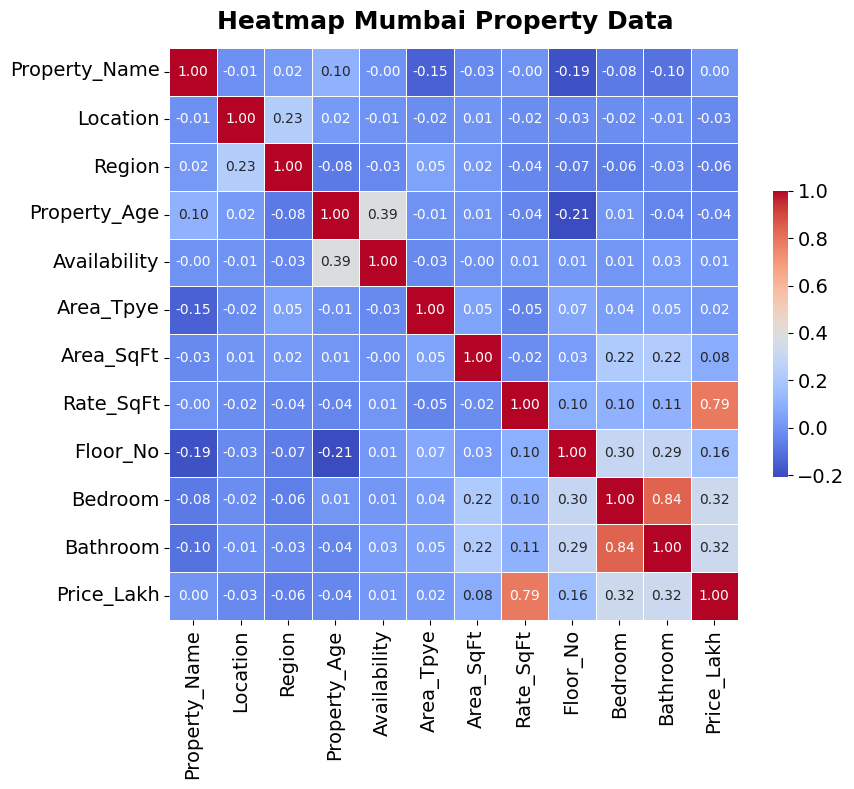

In [29]:
# Correlation Heatmap
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(mum_prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [15]:
# Model Building

# Train Test Split
X =  mum_prop.drop('Price_Lakh', axis = 1)
y =  mum_prop['Price_Lakh']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [17]:
print(X_train.shape, X_test.shape)

(2064, 11) (516, 11)


In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  0.6971201142693804
Test Accuracy     =  0.4820155328521434


In [19]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)
print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.9086857490806712


In [20]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.8717118474197125
Test Accuracy     =  0.916114985907298


In [21]:
# Polynomial Features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)
# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)
# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.8856525869035832
Test Accuracy     =  0.9776734048437095


In [22]:
# Final Model Evaluation
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)
    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [23]:
evaluate(poly_model, X_train, y_train)

Average Error  = 11.6491 degrees
Model Accuracy = 0.8857 %


In [30]:
evaluate(poly_model, X_test, y_test)

Average Error  = 10.3658 degrees
Model Accuracy = 0.9777 %


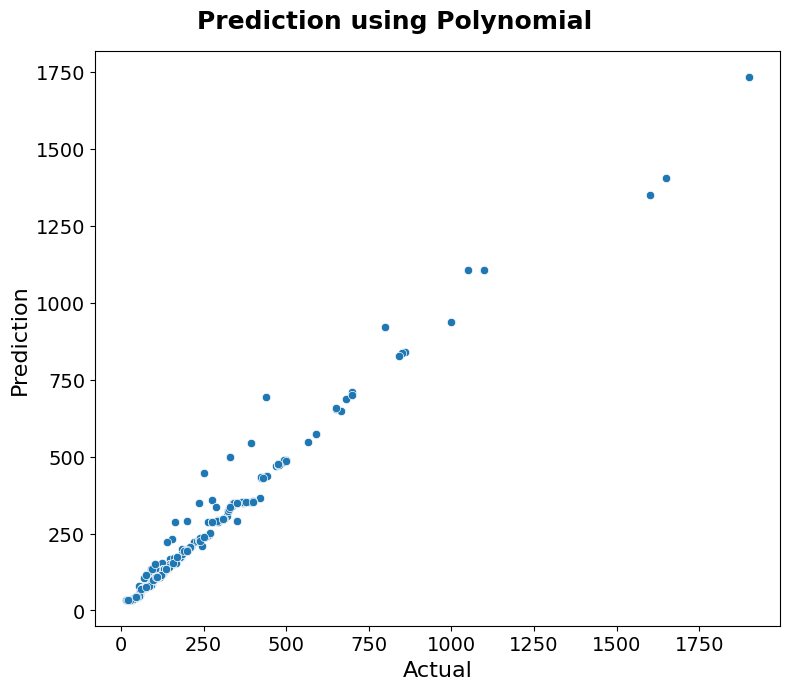

In [31]:
# Visualizing Results
pred = poly_model.predict(X_test)
fig = plt.figure(figsize=(8, 7))
sns.scatterplot(x=y_test, y=pred)
fig.suptitle('Prediction using Polynomial', fontsize=18, fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

In [32]:
# Save Model
from pickle import dump
dump(poly_model,open('regression_model.pkl','wb'))